# 서울시 공공자전거(따릉이) 분석 시각화

곽현지

사용한 데이터는 모두 "서울시열린데이터광장"에서 가져왔습니다. https://data.seoul.go.kr/

![](./img/2.png)

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F32N09%2FbtqwOA4U9in%2FuNZIaP2L8af84EnJS6KxF1%2Fimg.png" width="60%">

In [1]:
!pip install folium

In [2]:
import folium

## 1. 따릉이 거치대 (2019.12.09)
### 1-1. 따릉이 거치대 상세  위치

In [3]:
import numpy as np
import pandas as pd

In [4]:
from folium import plugins

In [7]:
bike = pd.read_excel("C:/Users/njj06/Desktop/시각화/seoul.xlsx", encoding='cp949')[:-1]

In [11]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for i in bike.index:
    lat = bike.loc[i, '위도']
    lng = bike.loc[i, '경도']
    name = bike.loc[i, '대여소명']
    num = bike.loc[i, '거치대수']
    icon = folium.features.CustomIcon("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F32N09%2FbtqwOA4U9in%2FuNZIaP2L8af84EnJS6KxF1%2Fimg.png",
                                      icon_size=(12, 12))
    folium.Marker([lat,lng],popup= str(name) + '(' + str(num) +')', 
                  icon=icon,
                  tooltip=name).add_to(m)
m

In [12]:
m.save('map.html')

총 1540개의 따릉이 대여소(2019.12 기준)

### 1-2. 구 별 따릉이 대여소 수 비교

In [9]:
import json
seoul_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [29]:
num = bike.groupby('대여소_구').size()
num.columns=['대여소_구','size']

In [30]:
# 단계구분도
m = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data=seoul_geo, 
    name='esri_pk',
    data=num,
    columns=['대여소_구', 'size'], 
    key_on='feature.properties.name', 
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    color = 'gray',
    legend_name='대여소 수'
).add_to(m)

m

In [31]:
num.sort_values(ascending=False).head()

대여소_구
강남구     99
송파구     99
영등포구    89
서초구     89
강서구     85
dtype: int64

강남구와 서초구가 많은 이유는 직장인들이 많기 때문 아닐까?

## 2. 따릉이 이용 현황
### 2-1. 일별 이용시간 산점도(20190227~20190413)

In [17]:
import matplotlib.pyplot as plt ; plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns

In [18]:
time = pd.read_csv("C:/Users/njj06/Desktop/시각화/time.csv", encoding='cp949')

C:\Users\njj06\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df = time.copy()

In [20]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-02-27,0,505,505. 자양사거리 광진아크로텔 앞,정기권,F,20대,1,23,0.28,1210,6
1,2019-02-27,0,1448,1448. 코스트코 상봉점,정기권,F,20대,1,25.48,0.23,990,5
2,2019-02-27,0,1650,1650. 중계근린공원내,정기권,F,20대,1,37.85,0.38,1620,10
3,2019-02-27,0,1654,1654. 당고개입구 오거리,정기권,F,20대,1,11.94,0.13,580,3
4,2019-02-27,0,302,302. 경복궁역 4번출구 뒤,정기권,F,20대,2,87.98,0.87,3770,20


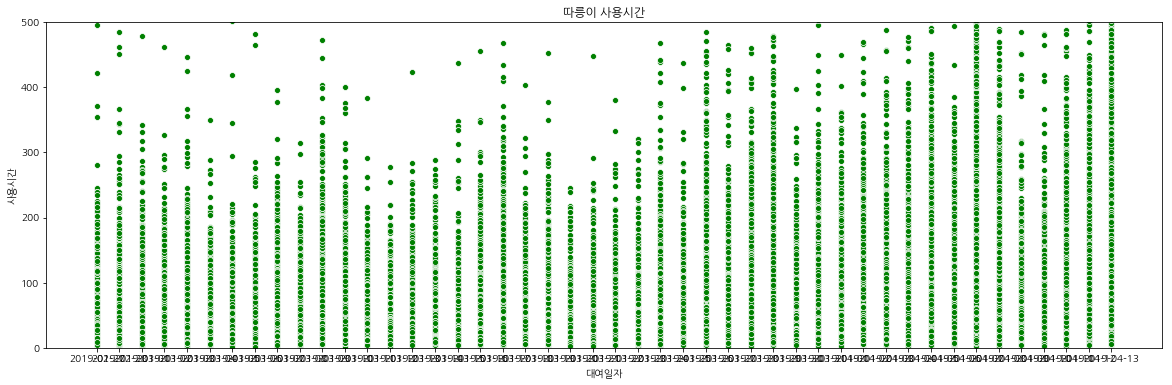

In [21]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.scatterplot(x='대여일자', y='사용시간', data=df, color='g')
a.set_ylim(0, 500)
a.set_title('따릉이 사용시간')
plt.show()

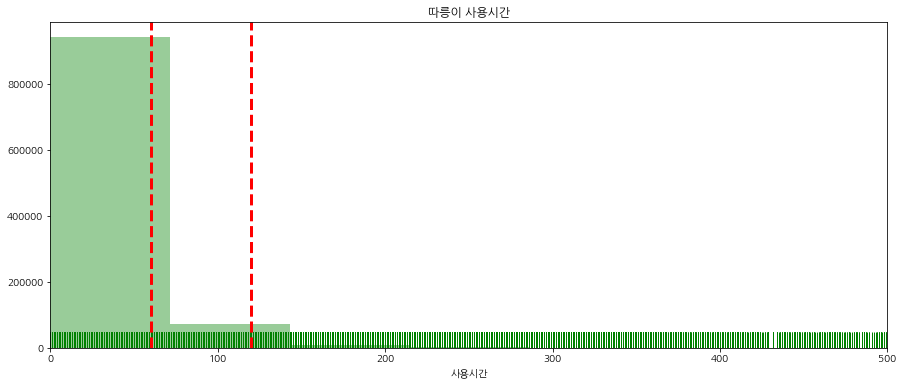

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
a = sns.distplot(df['사용시간'],kde=False, rug=True, color='g')
a.set_xlim(0,500)
a.axvline(x=60, color='r', linestyle='--', linewidth=3)
a.axvline(x=120, color='r', linestyle='--', linewidth=3)
a.set_title('따릉이 사용시간')
plt.show()

60분 120분 전후로 뚜렷한 차이를 보일 것이라 예상했으나 주어진 자료만으로는 알 수 없음.
따릉이는 시간을 기준으로 금액 측정, 초과하면 추가요금을 내야한다.

### 2-2. 시간대별 대여량

In [23]:
rent = pd.DataFrame(time.groupby('대여시간', as_index=False).size())

Text(0.5, 1.0, '따릉이 사용시간')

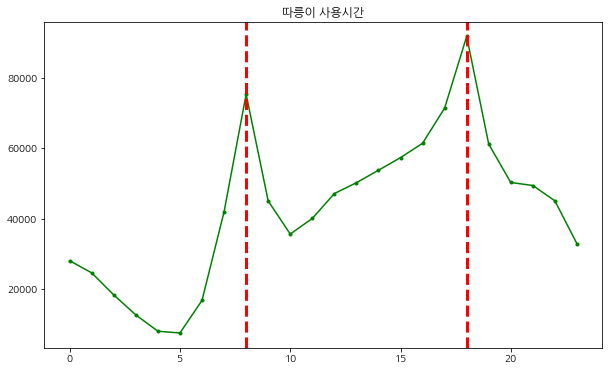

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(rent.index, rent, label='대여 건수', color='green', marker='.')
ax.axvline(x=8, color='r', linestyle='--', linewidth=3)
ax.axvline(x=18, color='r', linestyle='--', linewidth=3)
ax.set_title('따릉이 사용시간')

출퇴근 시간인 오전 8시와 오후 6시에 가장 많은 대여기록이 존재한다. 사람들이 따릉이를 통근수단으로 많이 사용함을 확인할 수 있다.

### 2-3. 인구와 대여소 수 비교

In [33]:
pop = pd.read_csv('population.txt', sep = "\t", engine='python', thousands = ',', encoding='UTF-8')

In [34]:
pop = pop[["자치구", "인구"]][3:]

In [36]:
pop = pop.sort_values(by="자치구")
pop["대여소_수"]= list(bike.groupby('대여소_구').size())

In [37]:
pop.head()

,자치구,인구,대여소_수
25,강남구,550209,99
27,강동구,440390,57
11,강북구,317695,39
18,강서구,598273,85
23,관악구,517334,51


In [38]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import CategoricalColorMapper
from bokeh.layouts import row
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets.embed import embed_minimal_html

In [39]:
output_notebook()

Loading BokehJS ...

In [40]:
source = ColumnDataSource(pop)
hover = HoverTool(tooltips=[('자치구', '@자치구'), ('인구', '@인구'), ('대여소', '@대여소_수')]) #실행이 안되는데 왜 안될까?

plot = figure(plot_width=400, plot_height=400, tools=[hover],
              x_axis_label='인구', y_axis_label='대여소 수', title='인구와 대여소 수 비교')
plot.circle('인구', '대여소_수', source=source, size=7, color='limegreen', hover_fill_color='gold', hover_alpha=0.3, hover_line_color='black')

show(plot)

In [41]:
pop["대여소_수"]=pd.to_numeric(pop["대여소_수"])
pop["인구"]=pd.to_numeric(pop["인구"])

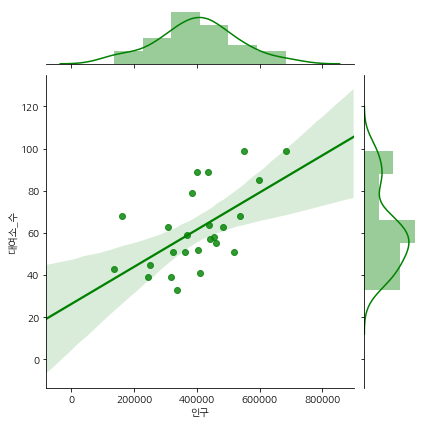

In [42]:
sns.jointplot(x='인구', y='대여소_수', data=pop, kind='reg', color='g')
plt.show()

인구수와 따릉이 대여소 수 사이에 어느정도 상관관계가 존재한다.

### 2-4. 연령별 따릉이 이용 비율 

In [43]:
time2 = pd.DataFrame()
time2["연령대코드"] = time["연령대코드"].unique()
time2["횟수"] = list(time.groupby('연령대코드').size())

In [44]:
time2

,연령대코드,횟수
0,20대,451703
1,30대,264038
2,40대,169227
3,50대,91041
4,60대,23490
5,70대~,6117
6,~10대,19647


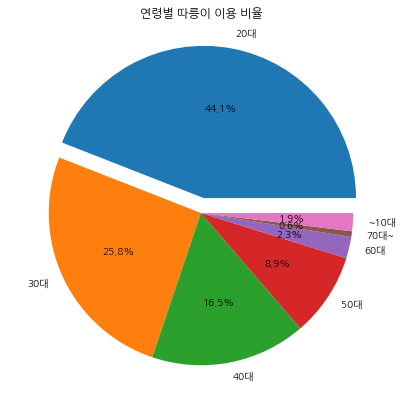

In [45]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(time2['횟수'], labels=time2['연령대코드'], autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0))
ax.set_title('연령별 따릉이 이용 비율')
plt.show()

10대를 제외하고는 연령이 어릴수록 따릉이 이용 비율이 높다.

In [46]:
info = pd.read_csv("C:/Users/njj06/Desktop/시각화/info.csv", encoding='cp949')

In [47]:
info.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0
1,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0
2,SPB-31969,2020-06-01 00:02:43,1306,한성대입구역2번출구,0,2020-06-01 00:06:59,388,동성중학교 앞,0,4,0.0
3,SPB-19763,2020-06-01 00:00:16,956,응암시장교차로,8,2020-06-01 00:08:25,939,은평구청 교차로,6,7,1340.0
4,SPB-32949,2020-06-01 00:04:20,709,신정3동 현장민원실 앞,0,2020-06-01 00:08:53,712,강월초교입구 사거리,0,5,0.0


In [48]:
# 대여량이 많은 상위 대여소
info['대여 대여소명'].value_counts().head(10)

여의나루역 1번출구 앞               10682
뚝섬유원지역 1번출구 앞              10504
마포구민체육센터 앞                  7710
봉림교 교통섬                     7382
마곡나루역 5번출구 뒤편               6053
고속터미널역 8-1번, 8-2번 출구 사이     5950
신대방역 2번 출구                  5322
양천향교역 7번출구앞                 5297
신도림역 1번 출구 앞                5147
청계천 생태교실 앞                  5144
Name: 대여 대여소명, dtype: int64

In [49]:
# 반납량이 많은 상위 대여소
info['반납대여소명'].value_counts().head(10)

뚝섬유원지역 1번출구 앞              11424
여의나루역 1번출구 앞               10876
마포구민체육센터 앞                  8323
봉림교 교통섬                     7407
고속터미널역 8-1번, 8-2번 출구 사이     6229
마곡나루역 5번출구 뒤편               5960
신대방역 2번 출구                  5416
청계천 생태교실 앞                  5309
옥수역 3번출구                    5305
당산육갑문                       5273
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소가 거의 일치한다. 
2. 대여반납이 많은 상위 대여소들 모두 강을 인근에 두고 있다.

In [50]:
same = []

for i in range(len(info)):
    if info["대여 대여소명"][i] == info["반납대여소명"][i]:
        same.append("True")
    else:
        same.append("False")

In [51]:
info["same"] = same
same_loc = info.loc[info["same"] == "True" ]
same_loc.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,same
11,SPB-33626,2020-06-01 00:01:01,1051,양지시장 (용성약국앞) 입구,0,2020-06-01 00:11:34,1051,양지시장 (용성약국앞) 입구,0,11,0.0,True
12,SPB-02707,2020-06-01 00:00:46,232,양평우림 이비즈센타 앞,19,2020-06-01 00:11:47,232,양평우림 이비즈센타 앞,19,10,0.0,True
173,SPB-34237,2020-06-01 00:37:13,242,신길선원가와인아파트 앞,0,2020-06-01 00:39:21,242,신길선원가와인아파트 앞,0,2,0.0,True
217,SPB-33315,2020-06-01 00:42:17,1318,길음역 3번출구 뒤,0,2020-06-01 00:44:14,1318,길음역 3번출구 뒤,0,2,0.0,True
253,SPB-30579,2020-06-01 00:03:30,1663,동해문화예술관앞,0,2020-06-01 00:48:41,1663,동해문화예술관앞,0,45,0.0,True


Text(0.5, 1.0, '대여/반납 장소 일치 여부')

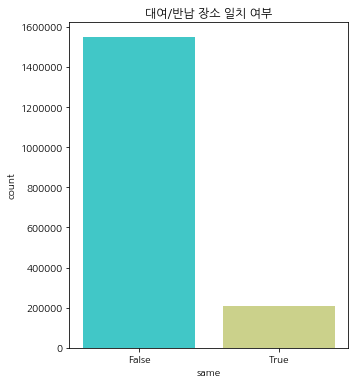

In [52]:
fig, ax = plt.subplots(figsize=(5,6))
a = sns.countplot(x = 'same', data=info, palette='rainbow')
a.set_title('대여/반납 장소 일치 여부')

대여장소와 반납장소가 일치하지 않는 것이 일반적이다.

In [53]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소
same_loc['대여 대여소명'].value_counts().head(10)

뚝섬유원지역 1번출구 앞              2945
여의나루역 1번출구 앞               2775
마포구민체육센터 앞                 2185
봉림교 교통섬                    1598
월드컵공원                      1512
옥수역 3번출구                   1507
고속터미널역 8-1번, 8-2번 출구 사이    1230
청계천 생태교실 앞                 1188
당산육갑문                      1159
독산보도육교 앞 자전거 보관소           1103
Name: 대여 대여소명, dtype: int64

대부분 한강 주변이나 공원 주변에 위치해 있다.